In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y dataset')

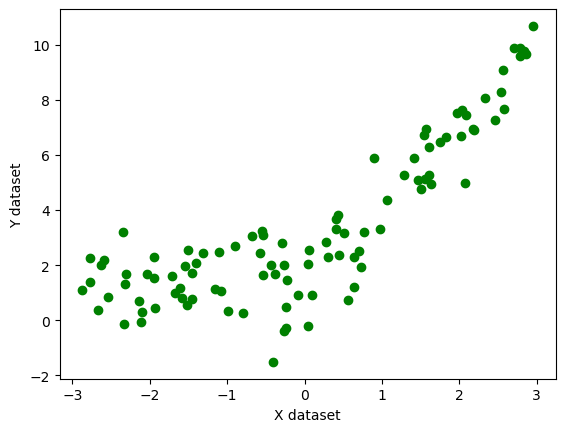

In [5]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic equation used y=0.5x^2+1.5x+outliers
plt.scatter(X,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Let's implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
# scaling is not done because the values are like scalled down only

In [15]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=regression_1.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7061037925631064

Text(0, 0.5, 'Y Dataset')

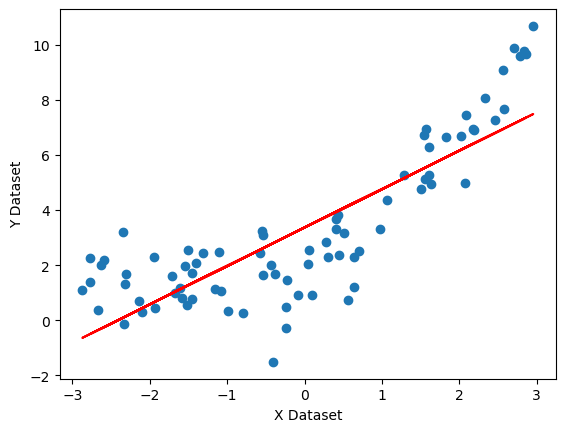

In [31]:
## Let's visualize this model
plt.plot(X_train,regression_1.predict(X_train),color="r")
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [42]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8346277793356511


In [44]:
print(regression.coef_)

[[0.         1.3530796  0.47569014]]


In [48]:
print(regression.intercept_)

[1.99760341]


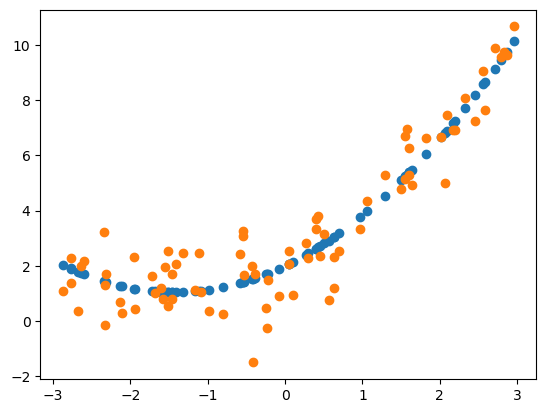

In [56]:
plt.scatter(X_train,regression.predict(X_train_poly)) ## THis is our best fit line
plt.scatter(X_train,y_train)

In [58]:
### what will happen if we increase degree to 3

In [60]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [64]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score) ### previous is better

0.8326972391095833


In [66]:
### Prediction of new data

In [68]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

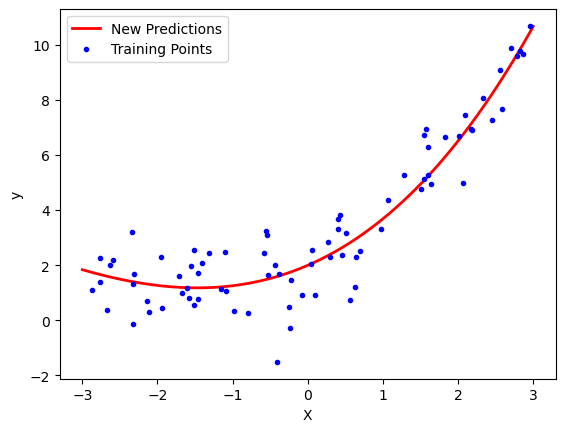

In [72]:
y_new =regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="New Predictions")
plt.plot(X_train,y_train,"b.",label="Training Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concepts

In [75]:
from sklearn.pipeline import Pipeline

In [81]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label="Degree "+str(degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

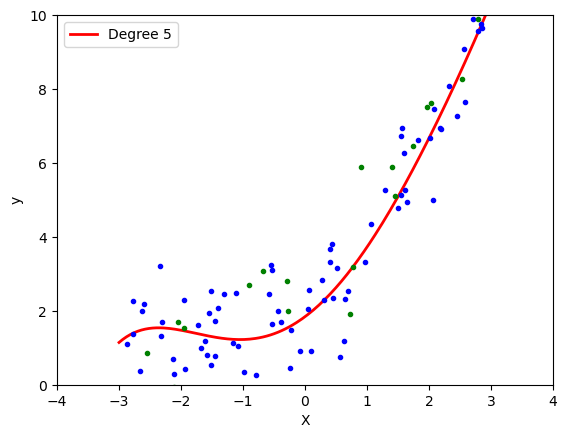

In [97]:
poly_regression(5)

In [ ]:
### In pipeline we combined 2 models